In [32]:
import pandas as pd
import seaborn as sns

from src.categorisations.income_categories import emissions_df
from matplotlib import pyplot as plt

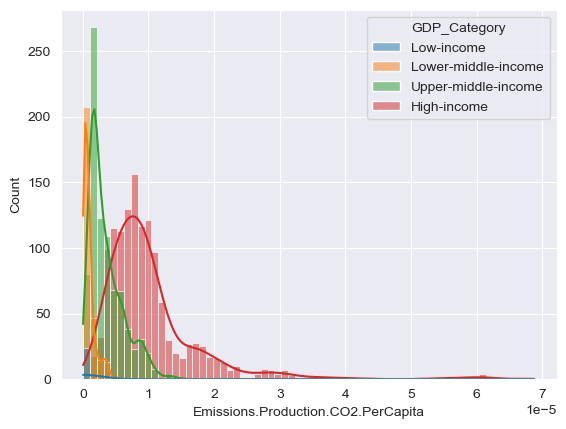

In [28]:
percapita_key = 'Emissions.Production.CO2.PerCapita'
co2_key = 'Emissions.Production.CO2.Total'
population_key = 'Country.Population'
emissions_df[percapita_key] = (emissions_df[co2_key] / emissions_df[population_key])

sns.histplot(emissions_df, x='Emissions.Production.CO2.PerCapita', hue='GDP_Category', kde=True, multiple='layer')
plt.show()


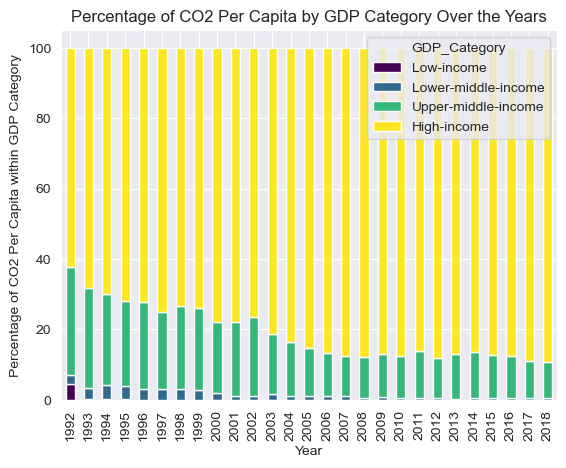

In [75]:
# Calculate the total per capita emissions for each GDP_Category and Year
year_wise = emissions_df.groupby(['Year', 'GDP_Category'])['Emissions.Production.CO2.PerCapita'].sum().reset_index()

# Calculate the percentage within each GDP_Category for each year
year_wise['Percentage'] = year_wise.groupby('Year')['Emissions.Production.CO2.PerCapita'].transform(lambda x: x / x.sum() * 100)

# Pivot the data for a stacked plot
pivot_df = year_wise.pivot(index='Year', columns='GDP_Category', values='Percentage')

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Create a stacked plot
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of CO2 Per Capita within GDP Category')
plt.title('Percentage of CO2 Per Capita by GDP Category Over the Years')

# Show the plot
plt.show()

<Axes: xlabel='Year', ylabel='Emissions.Production.CO2.PerCapita'>

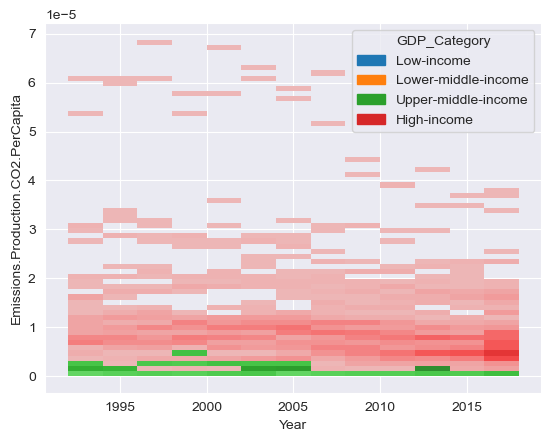

In [50]:
sns.histplot(emissions_df, x='Year', y='Emissions.Production.CO2.PerCapita', hue='GDP_Category', multiple='stacked')